In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [73]:
insurance_dataset = pd.read_csv('insurance.csv')

DATA ANALYSIS


In [74]:
insurance_dataset.head() 

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [75]:
insurance_dataset.shape  

(1338, 7)

In [76]:
insurance_dataset.info()                    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [77]:
insurance_dataset.isnull().sum()        

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [78]:
insurance_dataset.describe()  

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


<Figure size 2000x2000 with 0 Axes>

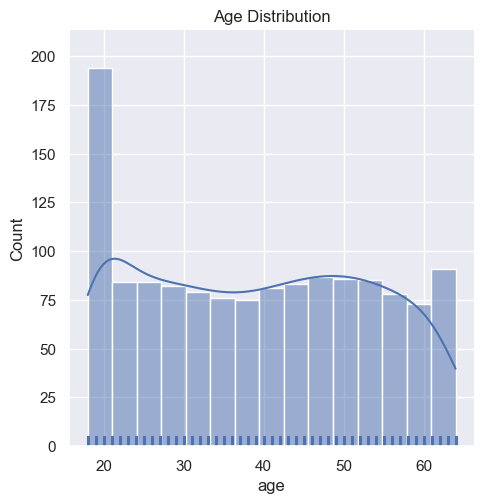

In [79]:
# distribution of age value
sns.set()                                        
plt.figure(figsize=(10,10),dpi=200)          
sns.displot(x='age',data=insurance_dataset,bins=15,kde=True,rug=True)
plt.title('Age Distribution')                    
plt.show();

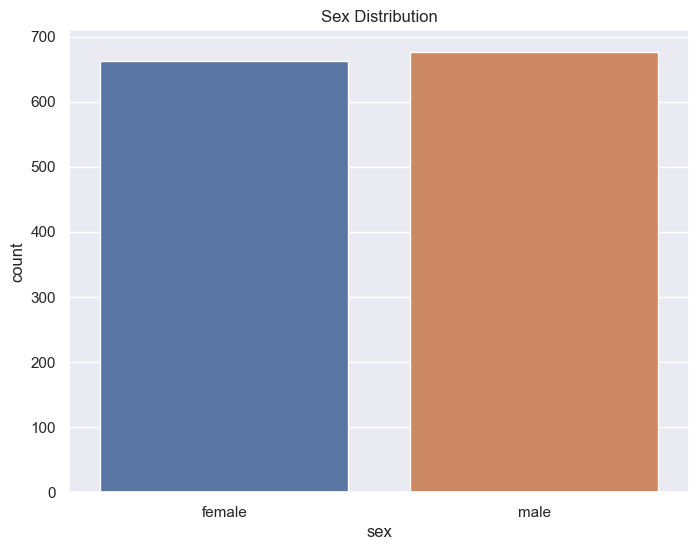

In [80]:
# Gender column
plt.figure(figsize=(8,6),dpi=100)                              # sets size of the graph           
sns.countplot(x='sex', data=insurance_dataset)           # used to display a count plot
plt.title('Sex Distribution')                            # gives the title of the graph
plt.show()  

<Figure size 2000x2600 with 0 Axes>

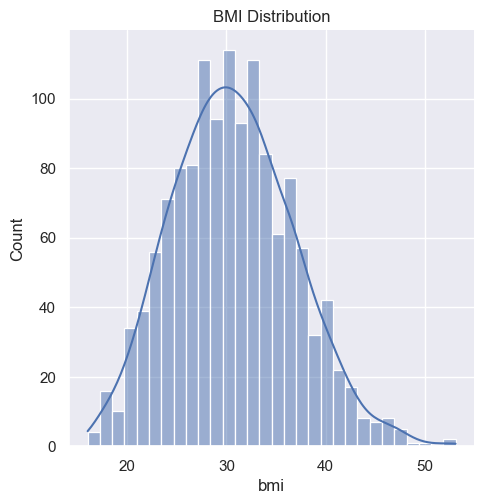

In [81]:
# bmi distribution
plt.figure(figsize=(10,13),dpi=200)             
sns.displot(x='bmi',data=insurance_dataset,bins=30,kde=True)
plt.title('BMI Distribution')                          
plt.show()      

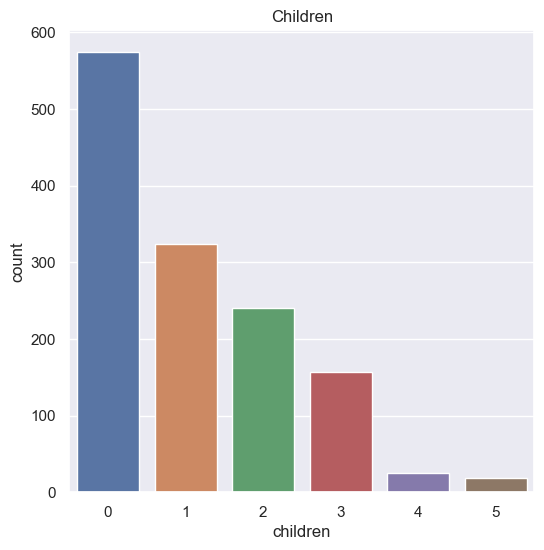

In [82]:
# children column
plt.figure(figsize=(6,6))                               # sets size of the graph
sns.countplot(x='children', data=insurance_dataset)     # used to display a count plot
plt.title('Children')                                   # used to display a count plot
plt.show()

In [83]:
insurance_dataset['children'].value_counts() 

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

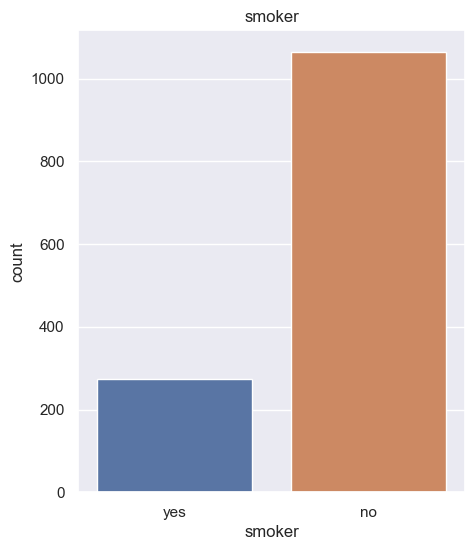

In [84]:
# smoker column
plt.figure(figsize=(5,6))                              # sets size of the graph
sns.countplot(x='smoker', data=insurance_dataset)      # used to display a count plot
plt.title('smoker')                                    # gives the title of the graph
plt.show()   

In [85]:
insurance_dataset['smoker'].value_counts()     

no     1064
yes     274
Name: smoker, dtype: int64

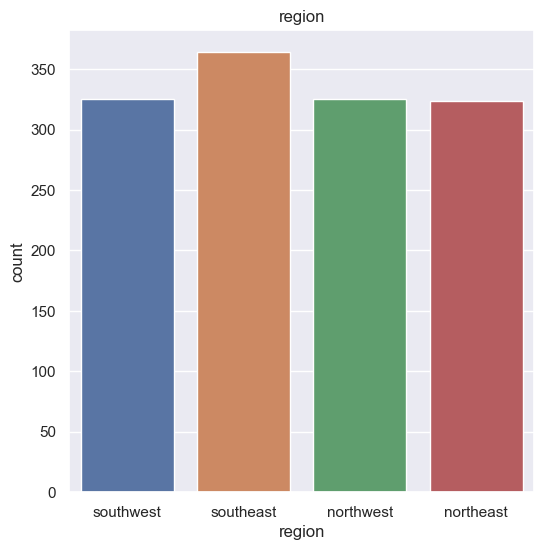

In [86]:
# region column
plt.figure(figsize=(6,6))                                # sets size of the graph
sns.countplot(x='region', data=insurance_dataset)        # used to display a count plot
plt.title('region')                                      # gives the title of the graph
plt.show()   

In [87]:
insurance_dataset['region'].value_counts() 

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 600x600 with 0 Axes>

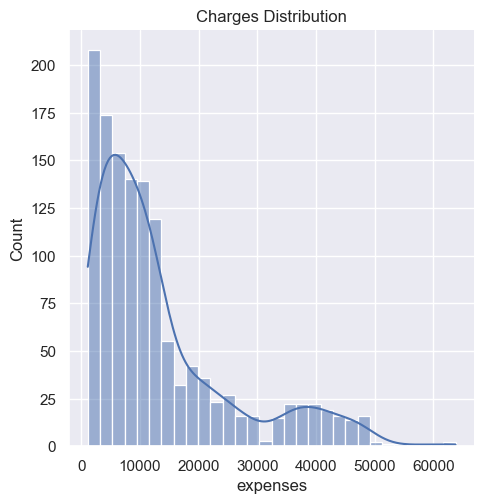

In [88]:
# distribution of charges value
plt.figure(figsize=(6,6))           
sns.displot(x='expenses',data=insurance_dataset,bins=30,kde=True)                        
plt.title('Charges Distribution')                           
plt.show()       

DATA PRE-PROCESSING

In [89]:
insurance_dataset

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [90]:
my_numeric_df = insurance_dataset.select_dtypes(exclude='object') 

In [91]:
my_object_df = insurance_dataset.select_dtypes(include='object')

In [92]:
df_object_dummies = pd.get_dummies(my_object_df,drop_first=True)
df_object_dummies

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
1333,1,0,1,0,0
1334,0,0,0,0,0
1335,0,0,0,1,0
1336,0,0,0,0,1


In [93]:
insurance = pd.concat([my_numeric_df,df_object_dummies],axis=1)
insurance

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,1


In [104]:
X = insurance.drop(columns='expenses', axis=1)                           # Droping 'Charges' and replacing it with 1 and storing in X
Y = insurance['expenses']           

In [105]:
from sklearn.model_selection import train_test_split     
from sklearn.linear_model import LinearRegression       
from sklearn import metrics

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [107]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 8) (1070, 8) (268, 8)


In [108]:
from sklearn.linear_model import ElasticNet

In [109]:
model = ElasticNet()

In [126]:
param_grid = {'alpha':[0.1,5,10,20,30,35,40,50,95,99],'l1_ratio':[0.1,0.3,0.5,0.65,0.85,0.97,0.99,1]}

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=10,verbose=3)

In [129]:
grid_model.fit(X_train,Y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
[CV 1/10] END ..alpha=0.1, l1_ratio=0.1;, score=-48183927.958 total time=   0.0s
[CV 2/10] END ..alpha=0.1, l1_ratio=0.1;, score=-32032746.607 total time=   0.0s
[CV 3/10] END ..alpha=0.1, l1_ratio=0.1;, score=-45846980.701 total time=   0.0s
[CV 4/10] END ..alpha=0.1, l1_ratio=0.1;, score=-43804805.895 total time=   0.0s
[CV 5/10] END ..alpha=0.1, l1_ratio=0.1;, score=-59156432.226 total time=   0.0s
[CV 6/10] END ..alpha=0.1, l1_ratio=0.1;, score=-58506360.331 total time=   0.0s
[CV 7/10] END ..alpha=0.1, l1_ratio=0.1;, score=-49844455.971 total time=   0.0s
[CV 8/10] END ..alpha=0.1, l1_ratio=0.1;, score=-57792797.032 total time=   0.0s
[CV 9/10] END ..alpha=0.1, l1_ratio=0.1;, score=-47783268.185 total time=   0.0s
[CV 10/10] END .alpha=0.1, l1_ratio=0.1;, score=-51350259.106 total time=   0.0s
[CV 1/10] END ..alpha=0.1, l1_ratio=0.3;, score=-44924233.496 total time=   0.0s
[CV 2/10] END ..alpha=0.1, l1_ratio=0.3;, scor

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 5, 10, 20, 30, 35, 40, 50, 95, 99],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.65, 0.85, 0.97, 0.99,
                                      1]},
             scoring='neg_mean_squared_error', verbose=3)

In [130]:
grid_model.best_params_

{'alpha': 30, 'l1_ratio': 1}

In [134]:
Y_predictions = grid_model.predict(X_test)

EVALUATION OF MODEL

In [143]:
training_data_prediction =grid_model.predict(X_train)

In [144]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7474140025265341


In [142]:
r2_test = metrics.r2_score(Y_test, Y_predictions)
print('R squared vale : ', r2_test)

R squared vale :  0.7612254452463947
